Built and Validated the model to predict 'audience_rating' using Rotten_Tomatoes_Movies Dataset. Demonstrated the working of the pipeline.

# Import Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

In [4]:
dataset=pd.read_excel('Rotten_Tomatoes_Movies3.xls')
dataset.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0


In [5]:
dataset.shape

(16638, 16)

# check for missing values

#check for missing values and their count in each column

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

In [9]:
dataset.isnull().sum().sort_values(ascending=False)

critics_consensus     8329
writers               1349
in_theaters_date       815
studio_name            416
cast                   284
audience_rating        252
runtime_in_minutes     155
directors              114
movie_info              24
genre                   17
on_streaming_date        2
movie_title              0
rating                   0
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
dtype: int64

#Dropping the rows having null value in audience_rating

In [11]:
dataset.dropna(subset=['audience_rating'], inplace=True)

# check for duplicates

#check for duplicates and drop the duplicated row

In [14]:
dataset.duplicated().sum()

1

In [15]:
dataset[dataset.duplicated()==True]

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
8496,King Charles III,An adaptation of the Broadway drama about Prin...,NaN,NR,Drama,Rupert Goold,Mike Bartlett,"Oliver Chris, Richard Goulding, Charlotte Rile...",2017-05-14,2017-06-27,88.0,NaN,Fresh,100,9,48.0


In [16]:
dataset.drop_duplicates(inplace=True)
dataset.duplicated().sum()

0

# The Dataset is split into train(97%) and test(3%). Training and validation is done on Train Dataset. The trained models performance is evaluated using Test Dataset.

In [18]:
df=dataset.iloc[:int(0.97*len(dataset)),:]
len(df)

15893

In [19]:
test_val_df=dataset.iloc[int(0.97*len(dataset)):,:]
len(test_val_df)

492

# Extracting numerical features

In [21]:
numerical_features=[feature for feature in df.columns if df[feature].dtype=='float64' or df[feature].dtype=='int64']
numerical_features
df[numerical_features].head(2)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
0,83.0,49,144,53.0
1,90.0,86,140,64.0


# checking for null in numerical_features

In [23]:
df[numerical_features].isnull().sum()

runtime_in_minutes    144
tomatometer_rating      0
tomatometer_count       0
audience_rating         0
dtype: int64

In [24]:
nulls=[i for i in df.columns if df[i].isnull().sum()>=1 and (df[i].dtypes=='float64' or df[i].dtype=='int64')]
nulls

['runtime_in_minutes']

In [25]:
df['runtime_in_minutes'].sort_values(ascending=False).head(10)

13539    2000.0
913       496.0
10372     480.0
4104      333.0
1844      315.0
12202     283.0
10266     272.0
944       271.0
1806      262.0
10539     250.0
Name: runtime_in_minutes, dtype: float64

# Handling Nulls in numerical features

#Replace the null in runtime_in_minutes with its median since it contains outliers

In [28]:
import warnings
warnings.filterwarnings("ignore")

In [29]:
#replace missing value using 0
def replace_feature(df,nulls):
    df[nulls]=df[nulls].fillna(df['runtime_in_minutes'].median())
    return df
df=replace_feature(df,nulls)
df[nulls].isnull().sum()

runtime_in_minutes    0
dtype: int64

# Extracting categorical feature

In [31]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='object' and feature not in ('movie_title','movie_info','critics_consensus','cast')]
categorical_features

['rating',
 'genre',
 'directors',
 'writers',
 'studio_name',
 'tomatometer_status']

# checking for null in Categorical features

In [33]:
df[categorical_features].isnull().sum().sort_values(ascending=False)

writers               1243
studio_name            362
directors              100
genre                   16
rating                   0
tomatometer_status       0
dtype: int64

In [34]:
df[categorical_features].head()

,rating,genre,directors,writers,studio_name,tomatometer_status
0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,20th Century Fox,Rotten
1,R,Comedy,Nicole Holofcener,Nicole Holofcener,Sony Pictures Classics,Certified Fresh
2,R,"Comedy, Romance",Blake Edwards,Blake Edwards,Waner Bros.,Fresh
3,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,Criterion Collection,Certified Fresh
4,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,Disney,Fresh


In [35]:
cat_nulls=[i for i in categorical_features if df[i].isnull().sum()>=1]
cat_nulls

['genre', 'directors', 'writers', 'studio_name']

# Handling Nulls in categorical features

#Replace all missing value using new label

In [38]:
def replace(df,cat_nulls):
    df[cat_nulls]=df[cat_nulls].fillna('Missing')
    return df
df=replace(df,cat_nulls) 
df[cat_nulls].isnull().sum()

genre          0
directors      0
writers        0
studio_name    0
dtype: int64

In [39]:
num=df[numerical_features]
cat=df[categorical_features]
dff=pd.concat([num,cat],axis=1)
dff.head(5)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating,genre,directors,writers,studio_name,tomatometer_status
0,83.0,49,144,53.0,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,20th Century Fox,Rotten
1,90.0,86,140,64.0,R,Comedy,Nicole Holofcener,Nicole Holofcener,Sony Pictures Classics,Certified Fresh
2,118.0,68,22,53.0,R,"Comedy, Romance",Blake Edwards,Blake Edwards,Waner Bros.,Fresh
3,95.0,100,51,97.0,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,Criterion Collection,Certified Fresh
4,127.0,89,27,74.0,G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,Disney,Fresh


# Handling data inconsistency

In [41]:
dff['rating'].value_counts()

rating
R         5960
NR        4505
PG-13     2772
PG        1980
G          638
NC17        34
PG-13)       3
R)           1
Name: count, dtype: int64

In [42]:
dff.replace('PG-13)','PG-13', inplace=True)
dff.replace('R)','R', inplace=True)
dff['rating'].value_counts()

rating
R        5961
NR       4505
PG-13    2775
PG       1980
G         638
NC17       34
Name: count, dtype: int64

In [43]:
dff['rating'].value_counts()

rating
R        5961
NR       4505
PG-13    2775
PG       1980
G         638
NC17       34
Name: count, dtype: int64

# Encoding Categorical variables- rating feature

#Rating feature is encoded by mean encoding

In [46]:
rating_mean=dff.groupby('rating')['audience_rating'].mean().round(2)
dff['rating']=dff['rating'].map(rating_mean)
dff['rating'].head(2)

0    62.69
1    56.72
Name: rating, dtype: float64

# Encoding Categorical variables- tomatometer_status feature 

#tomatometer_status feature is encoded by Ordinal encoding

In [49]:
from sklearn.preprocessing import OrdinalEncoder
rating_order = ['Rotten','Fresh','Certified Fresh']
encoder_status= OrdinalEncoder(categories=[rating_order])
dff['tomatometer_status'] = encoder_status.fit_transform(dff[['tomatometer_status']])
dff.head(2)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating,genre,directors,writers,studio_name,tomatometer_status
0,83.0,49,144,53.0,62.69,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,20th Century Fox,0.0
1,90.0,86,140,64.0,56.72,Comedy,Nicole Holofcener,Nicole Holofcener,Sony Pictures Classics,2.0


# Encoding Categorical variables- genre feature 

#Selected the Top Genres and encoded using one hot encoding

In [52]:
df['genre'].value_counts().head(10)

genre
Drama                                            1621
Comedy                                           1133
Comedy, Drama                                     780
Drama, Mystery & Suspense                         666
Art House & International, Drama                  552
Documentary, Special Interest                     510
Horror                                            389
Documentary                                       376
Action & Adventure, Drama                         333
Action & Adventure, Drama, Mystery & Suspense     314
Name: count, dtype: int64

In [53]:
dft=df['genre'].str.split(',', expand=True)
from collections import Counter
d={}
for i in dft.columns:
    g=dft[i]
    cg=Counter(g)
    for k,v in cg.items():
        k=str(k).strip()
        if d.get(k):
             d[k]+=v
        else:
            d[k]=v
l={k:d[k] for k in sorted(d,key=lambda x:d[x],reverse=True)}       
l.pop('None')
l

{'Drama': 8640,
 'Comedy': 5147,
 'Action & Adventure': 3248,
 'Mystery & Suspense': 3223,
 'Art House & International': 2312,
 'Horror': 1828,
 'Documentary': 1779,
 'Romance': 1739,
 'Science Fiction & Fantasy': 1687,
 'Classics': 1529,
 'Special Interest': 1142,
 'Kids & Family': 1036,
 'Musical & Performing Arts': 916,
 'Animation': 542,
 'Western': 276,
 'Television': 243,
 'Sports & Fitness': 169,
 'Cult Movies': 96,
 'Faith & Spirituality': 72,
 'Gay & Lesbian': 67,
 'Missing': 16,
 'Anime & Manga': 15}

In [54]:
one_hot=list(l.keys())[:13]
one_hot

['Drama',
 'Comedy',
 'Action & Adventure',
 'Mystery & Suspense',
 'Art House & International',
 'Horror',
 'Documentary',
 'Romance',
 'Science Fiction & Fantasy',
 'Classics',
 'Special Interest',
 'Kids & Family',
 'Musical & Performing Arts']

In [55]:
for i in one_hot:
    df[i]=0  

In [56]:
def isgenrepresent(val, col):
    if col.strip() in val:
        return 1
    else:
        return 0
    
for i in one_hot:
    df[i] = df.apply(lambda x: isgenrepresent(x.genre, i ), axis=1)
pd.set_option('display.max_column',None)
df.head(2)

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating,Drama,Comedy,Action & Adventure,Mystery & Suspense,Art House & International,Horror,Documentary,Romance,Science Fiction & Fantasy,Classics,Special Interest,Kids & Family,Musical & Performing Arts
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0,1,1,1,0,0,0,0,0,1,0,0,0,0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
genre_mean_ratings = []
for i in one_hot:
    a=df.groupby(i)['audience_rating'].mean().round(2)[1]
    genre_mean_ratings.append((i,a))
genre_mean_df = pd.DataFrame(genre_mean_ratings, columns=['Genre', 'Mean Audience Rating'])
genre_mean_df

,Genre,Mean Audience Rating
0,Drama,63.06
1,Comedy,58.17
2,Action & Adventure,57.60
3,Mystery & Suspense,53.99
4,Art House & International,66.58
5,Horror,46.38
6,Documentary,72.88
7,Romance,63.54
8,Science Fiction & Fantasy,56.16
9,Classics,71.35


<Axes: xlabel='Mean Audience Rating', ylabel='Genre'>

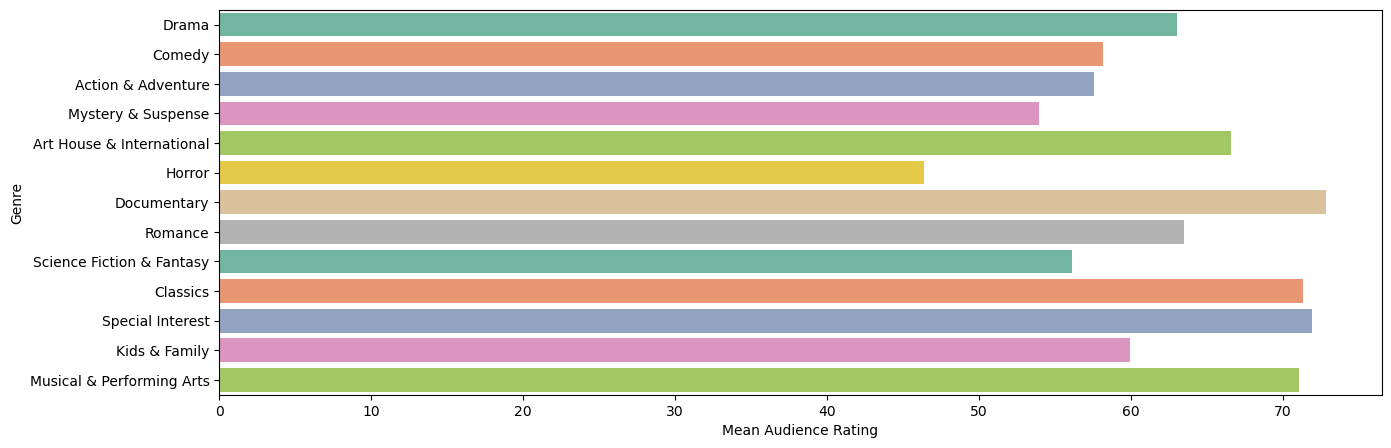

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
sns.barplot(x="Mean Audience Rating", y="Genre",hue="Genre",data=genre_mean_df,palette='Set2')

# Encoding Categorical variables- directors feature 

#selected the Top directors with more counts and rename rest to 'Others' and encoded using label encoding

In [61]:
dir=df['directors'].value_counts()
dir.head(15)

directors
Missing              100
Alfred Hitchcock      35
Clint Eastwood        34
Woody Allen           33
Steven Spielberg      32
Sidney Lumet          29
Steven Soderbergh     26
Blake Edwards         26
John Ford             25
Martin Scorsese       25
Ridley Scott          24
Ron Howard            23
Werner Herzog         23
Barry Levinson        22
Spike Lee             22
Name: count, dtype: int64

In [62]:
dir_list=dir[dir>20].index.to_list()
dir_list
filtered_df = df[df['directors'].isin(dir_list)]

# Group by 'directors' and calculate the mean of 'audience_rating'
director_audience_mean = filtered_df.groupby('directors')['audience_rating'].mean().round(2)
director_audience_mean
director_mean_df = director_audience_mean.reset_index()
director_mean_df.rename(columns={'audience_rating':'mean_audience_rating'},inplace=True)
director_mean_df.head(5)

,directors,mean_audience_rating
0,Alfred Hitchcock,70.63
1,Barry Levinson,57.32
2,Blake Edwards,62.38
3,Clint Eastwood,67.74
4,John Ford,76.32


<Axes: xlabel='mean_audience_rating', ylabel='directors'>

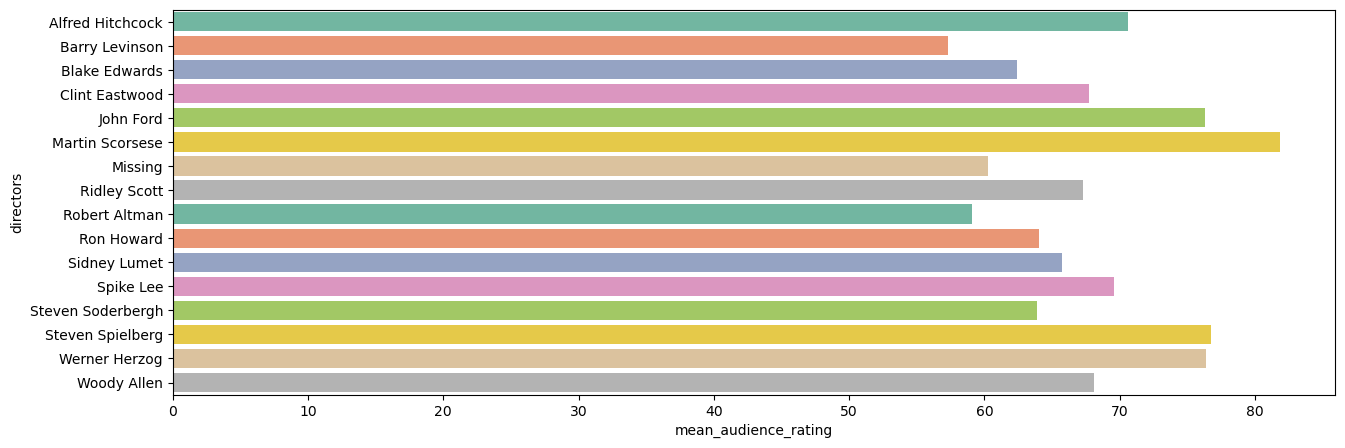

In [63]:
plt.figure(figsize=(15,5))
sns.barplot(y="directors", x="mean_audience_rating",hue="directors",data=director_mean_df,palette='Set2')

In [64]:
dir.drop('Missing',axis=0, inplace=True)

In [65]:
top_dir = dir[dir >=30].index

In [66]:
top_dir

Index(['Alfred Hitchcock', 'Clint Eastwood', 'Woody Allen',
       'Steven Spielberg'],
      dtype='object', name='directors')

In [67]:
dff['directors']=dff['directors'].apply(lambda x: x if x in top_dir else 'Others')

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dff['directors']=le.fit_transform(dff['directors'])

# Encoding Categorical variables- writers feature 

#selected the Top Writers with more counts and rename rest to 'Others' and encoded using label encoding

In [71]:
writers=dff['writers'].value_counts()
writers.head(15)

writers
Missing               1243
Woody Allen             29
Neil Simon              19
Werner Herzog           18
David Mamet             18
John Hughes             17
Tyler Perry             17
Ingmar Bergman          16
Larry Cohen             15
Jim Jarmusch            13
John Sayles             13
William Goldman         13
Pedro Almod√≥var        12
Paul Schrader           12
M. Night Shyamalan      11
Name: count, dtype: int64

In [72]:
writers_list=writers[writers>10].index.to_list()
writers_df = df[df['writers'].isin(writers_list)]
writers_audience_mean = writers_df.groupby('writers')['audience_rating'].mean().round(2)

writers_mean_df = writers_audience_mean.reset_index()
writers_mean_df.rename(columns={'audience_rating':'mean_audience_rating'},inplace=True)

<Axes: xlabel='mean_audience_rating', ylabel='writers'>

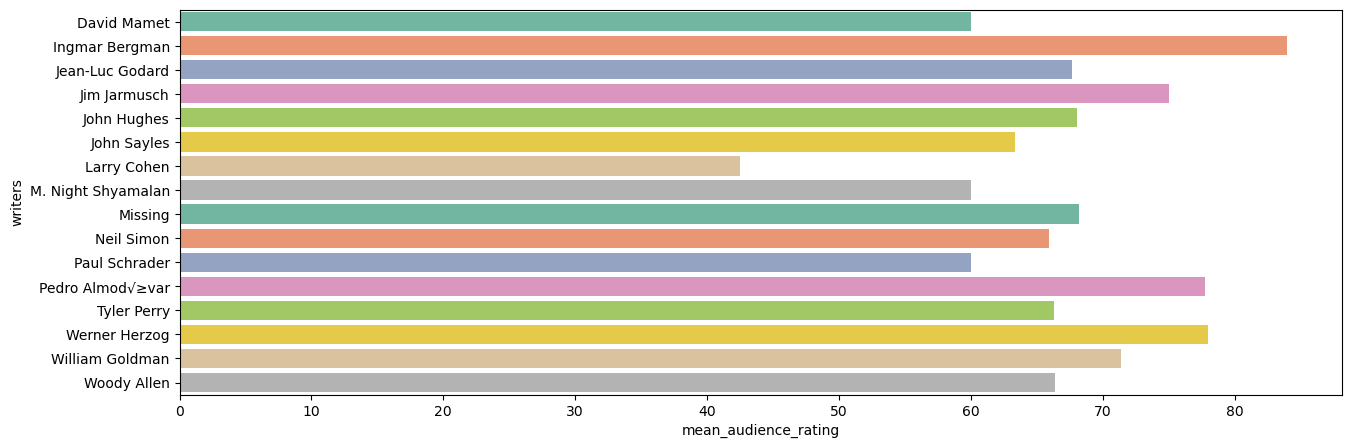

In [73]:
plt.figure(figsize=(15,5))
sns.barplot(x="mean_audience_rating", y="writers",hue="writers",data=writers_mean_df,palette='Set2')


In [74]:
top_writers=writers[(writers.values>15) & (writers.index!='Missing')]
dff['writers']=dff['writers'].apply(lambda x: x if x in top_writers else 'Others')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dff['writers']=le.fit_transform(dff['writers'])

In [75]:
dff.head(2)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating,genre,directors,writers,studio_name,tomatometer_status
0,83.0,49,144,53.0,62.69,"Action & Adventure, Comedy, Drama, Science Fic...",2,4,20th Century Fox,0.0
1,90.0,86,140,64.0,56.72,Comedy,2,4,Sony Pictures Classics,2.0


# Encoding Categorical variables- studio_name feature 

#selected the Top Studio_name with more counts and rename rest to 'Others' and encoded using label encoding

In [78]:
studio=dff['studio_name'].value_counts()
top_studio=studio[studio>350]
dff['studio_name']=dff['studio_name'].apply(lambda x: x if x in top_studio else 'Others')
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dff['studio_name']=le.fit_transform(dff['studio_name'])

# Handling dates

#Subtracted year of in_theaters_date, on_streaming_date from current year. Categorized them into bins. Encoded by Label encoding

In [81]:
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'])
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'])

df['in_theaters_date'] = df['in_theaters_date'].dt.year
df['on_streaming_date'] = df['on_streaming_date'].dt.year

current_year = pd.to_datetime('today').year

df['years_since_theater_release'] = current_year - df['in_theaters_date']
df['years_since_on_streaming_date'] = current_year - df['on_streaming_date']

In [82]:
def categorize_rating_a(rating):
    if 0 <= rating <= 10:
        return '0-10 years'
    elif 10 < rating < 30:
        return '10-30 years'
    elif 30 <= rating <= 100:
        return '30+ years'
    else:
        return 'Unknown'  # For values outside 0-100 range

# Apply the function to the 'audience_rating' column
df['years_since_on_streaming'] = df['years_since_on_streaming_date'].apply(categorize_rating_a)
mean_on_streaming= df.groupby('years_since_on_streaming')['audience_rating'].mean()
mean_on_streaming

years_since_on_streaming
0-10 years     57.087825
10-30 years    61.681494
30+ years      52.787611
Unknown        75.000000
Name: audience_rating, dtype: float64

In [83]:
categories_on_streaming_year=df['years_since_on_streaming'].value_counts()
categories_on_streaming_year.pop('Unknown')
mean_on_streaming.pop('Unknown')
mean_on_streaming=pd.DataFrame(mean_on_streaming)
mean_on_streaming

,audience_rating
years_since_on_streaming,
0-10 years,57.087825
10-30 years,61.681494
30+ years,52.787611


<Axes: xlabel='years_since_on_streaming', ylabel='audience_rating'>

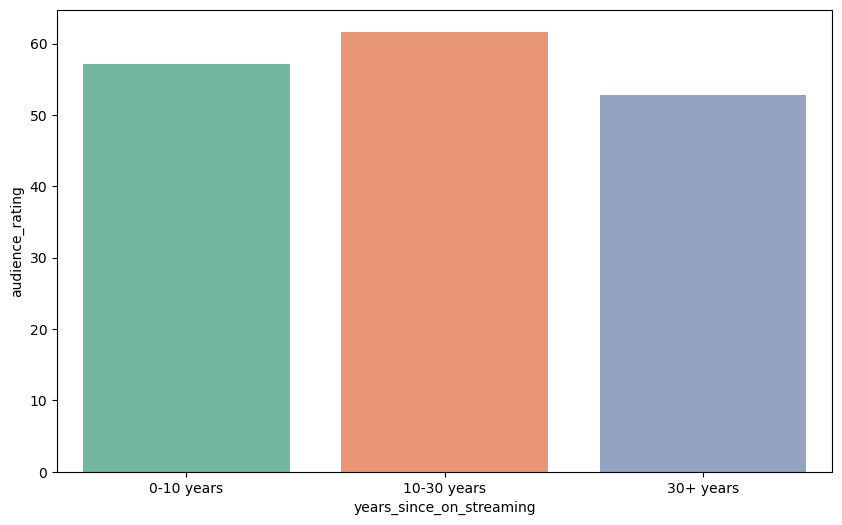

In [84]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.barplot(x="years_since_on_streaming", y="audience_rating" ,hue='years_since_on_streaming',data=mean_on_streaming, palette='Set2')

In [85]:
def categorize_rating_b(rating):
    if 0 <= rating <= 40:
        return '0-40 years'
    elif 40 < rating <= 80:
        return '40-80 years'
    elif 80 < rating <= 130:
        return '80+ years'
    else:
        return 'Unknown'  # For values outside 0-100 range

# Apply the function to the 'audience_rating' column
df['years_since_theater_release'] = df['years_since_theater_release'].apply(categorize_rating_b)
mean_theater_release= df.groupby('years_since_theater_release')['audience_rating'].mean()

categories_theater_release=df['years_since_theater_release'].value_counts()
mean_on_theatre=pd.DataFrame(mean_theater_release)
mean_on_theatre

,audience_rating
years_since_theater_release,
0-40 years,58.880016
40-80 years,68.497727
80+ years,73.484848
Unknown,55.974101


<Axes: xlabel='years_since_theater_release', ylabel='audience_rating'>

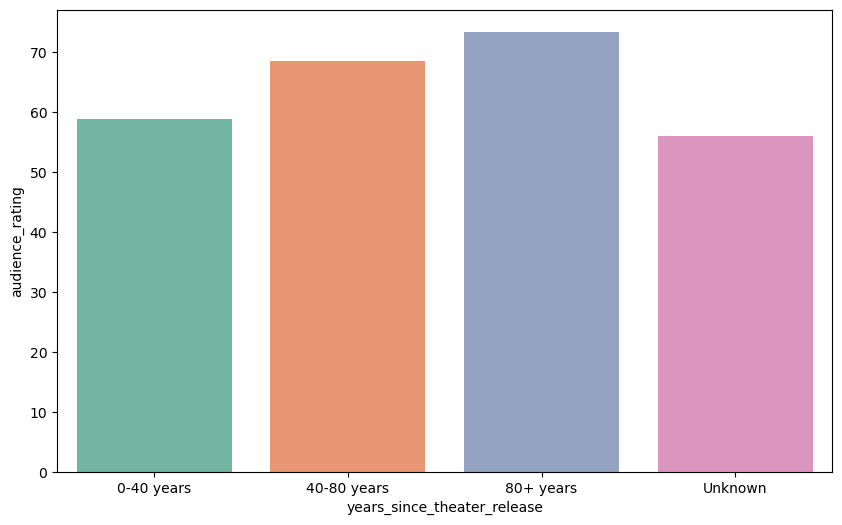

In [86]:
plt.figure(figsize=(10,6))
sns.barplot(x="years_since_theater_release", y="audience_rating" ,hue='years_since_theater_release',data=mean_on_theatre,palette='Set2')

In [87]:
from sklearn.preprocessing import LabelEncoder

# Initialize the LabelEncoder
label_encoder_tr = LabelEncoder()
label_encoder_os = LabelEncoder()
# Apply label encoding to the 'release_year_bin'
df['encoded_release_year'] = label_encoder_tr.fit_transform(df['years_since_theater_release'])
df['encoded_on_streaming_date'] = label_encoder_os.fit_transform(df['years_since_on_streaming'])

In [88]:
date=df[['encoded_release_year', 'encoded_on_streaming_date']]
one_hot_genre=df[one_hot]
dff.drop('genre',axis=1,inplace=True)
df_n=pd.concat([dff,date,one_hot_genre],axis=1)

#Check the correlation with the target audience_rating

In [90]:
df_n.corr()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,rating,directors,writers,studio_name,tomatometer_status,encoded_release_year,encoded_on_streaming_date,Drama,Comedy,Action & Adventure,Mystery & Suspense,Art House & International,Horror,Documentary,Romance,Science Fiction & Fantasy,Classics,Special Interest,Kids & Family,Musical & Performing Arts
runtime_in_minutes,1.000000,0.075243,0.186956,0.166482,-0.083530,-0.006185,-0.008349,0.066751,0.106942,-0.032378,0.044185,0.193026,-0.077236,0.086968,0.034508,0.051612,-0.095678,-0.141158,0.077359,0.004140,0.081153,-0.102848,-0.086437,0.003322
tomatometer_rating,0.075243,1.000000,0.084345,0.660532,0.244586,-0.010758,-0.004218,-0.023975,0.807759,0.182691,-0.031885,0.101860,-0.138263,-0.114001,-0.091669,0.150865,-0.120412,0.250627,0.003843,-0.061279,0.215417,0.168109,-0.048667,0.095091
tomatometer_count,0.186956,0.084345,1.000000,0.142458,-0.265905,0.033855,0.029420,0.124022,0.276627,-0.257612,-0.123677,0.039136,0.010688,0.116880,0.026780,-0.102924,-0.059900,-0.118988,-0.000582,0.125791,-0.171419,-0.087180,0.032460,-0.059218
audience_rating,0.166482,0.660532,0.142458,1.000000,0.168078,0.001358,-0.002827,0.029182,0.582871,0.076357,0.088392,0.140569,-0.075872,-0.069749,-0.158211,0.124183,-0.246939,0.215934,0.053345,-0.071565,0.174086,0.156507,-0.005485,0.128590
rating,-0.083530,0.244586,-0.265905,0.168078,1.000000,-0.013473,0.009190,-0.074906,0.104529,0.261117,-0.061879,-0.115508,-0.036070,-0.059003,-0.181421,0.063338,-0.117429,0.223835,0.009011,0.043947,0.272953,0.146171,0.286264,0.133608
directors,-0.006185,-0.010758,0.033855,0.001358,-0.013473,1.000000,0.309976,-0.035753,0.000265,-0.050730,-0.011959,-0.005837,0.039595,-0.004038,-0.058786,0.001068,-0.005828,-0.001818,0.014729,0.019102,-0.089874,-0.002621,0.007675,-0.003062
writers,-0.008349,-0.004218,0.029420,-0.002827,0.009190,0.309976,1.000000,-0.015203,-0.001991,-0.011374,-0.019883,-0.010837,0.014196,-0.001505,-0.018276,-0.010837,0.004888,0.016808,0.019491,-0.001308,-0.004403,0.005597,-0.008556,-0.002422
studio_name,0.066751,-0.023975,0.124022,0.029182,-0.074906,-0.035753,-0.015203,1.000000,-0.018677,-0.001604,0.079873,0.003372,0.024748,0.072595,0.029438,-0.074212,0.015353,-0.070157,0.016652,0.049558,0.034638,-0.046648,0.022522,0.000393
tomatometer_status,0.106942,0.807759,0.276627,0.582871,0.104529,0.000265,-0.001991,-0.018677,1.000000,0.045990,-0.053661,0.089652,-0.103232,-0.084458,-0.067935,0.118990,-0.106353,0.175740,-0.014757,-0.035142,0.094704,0.115151,-0.034436,0.050459
encoded_release_year,-0.032378,0.182691,-0.257612,0.076357,0.261117,-0.050730,-0.011374,-0.001604,0.045990,1.000000,0.032915,-0.012418,-0.034334,0.012054,-0.003718,-0.001471,0.054666,-0.049327,0.031383,0.009340,0.407966,-0.054215,-0.000228,0.041845


#Directors,writers,studio_name columns are removed because there is possibility of addition of upcoming/new directors,writers,studio_name in the features. When these features are included by label/mean encoding it leads to overfitting of data.

In [92]:
x=df_n.drop(['directors','writers','studio_name','audience_rating'],axis=1)
df_final=x
x.head(2)

,runtime_in_minutes,tomatometer_rating,tomatometer_count,rating,tomatometer_status,encoded_release_year,encoded_on_streaming_date,Drama,Comedy,Action & Adventure,Mystery & Suspense,Art House & International,Horror,Documentary,Romance,Science Fiction & Fantasy,Classics,Special Interest,Kids & Family,Musical & Performing Arts
0,83.0,49,144,62.69,0.0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0
1,90.0,86,140,56.72,2.0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [93]:
y=df_n['audience_rating']

# Split the Data into Training and Testing Dataset

#Split the Data into Training (80%) and Testing(20%) Dataset

In [96]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x ,y, test_size=0.20,random_state=0)

# Normalise the model using MinMaxScaler

In [98]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform training data
x_test_scaled = scaler.transform(x_test)

# Feature Selection by SelectKBest

In [100]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
fe = SelectKBest(f_classif, k=15)
X_new=fe.fit_transform(x_train_scaled, y_train)
X_test=fe.transform(x_test_scaled)

X_new.shape

(12714, 15)

# Building and Training the Model

In [102]:
x_train_selected_fe=X_new
x_test_selected_fe=X_test

Experimented with other models, given are the following models and their MAE:
#DecisionTreeRegressor-MAE:15.9
#RandomForestRegressor-MAE:11.7 
#KNeighborsRegressor after finding out optimal K(11)- MAE-11.5
#GradientBoostingRegressor without any hyperparameter tuning-MAE-11.3 
#XGBoost with yperparameter tuning-MAE-12.9

# RandomizedSearchCV -GradientBoostingRegressor

from sklearn.model_selection import RandomizedSearchCV 
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np

  
#Define the hyperparameters and their distributions 
param_distributions = { 
    'min_samples_leaf':np.arange(5, 50, 5) , 
    'max_depth':np.arange(5, 50, 5),
    'learning_rate': np.linspace(0.01, 0.2, 10),
    'min_samples_split':np.arange(5, 50, 5),
    'n_estimators':[50, 100, 150]
    
} 
  
#Create a model 
model =GradientBoostingRegressor (random_state=231) 
  
#Use randomized search to find the optimal hyperparameters 
random_search = RandomizedSearchCV(model, 
                                   param_distributions) 
random_search.fit(x_train_selected_fe, y_train) 
  
#Print the optimal values for the hyperparameters 
print(random_search.best_params_) 

In [106]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
Param={'n_estimators': 150, 'min_samples_split': 25, 'min_samples_leaf': 10, 'max_depth': 5, 'learning_rate': 0.09444444444444444}
gb_regressor_rv = GradientBoostingRegressor(**Param, random_state=231)
gb_regressor_rv.fit(x_train_selected_fe, y_train)
gb_pred = gb_regressor_rv.predict(x_test_selected_fe)
mae_gb_rv = mean_absolute_error(y_test, gb_pred)
print(f'mae score: {mae_gb_rv}')

mae score: 10.560261248910852


# Definition and Declaration of pipeline

In [108]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('MinMaxScaler', MinMaxScaler()),  # Step 1: Scale the data
    ('feature_selector',SelectKBest(f_classif, k=15) ),  # Step 2: Select features using SelectKBest
    ('model', GradientBoostingRegressor(n_estimators= 150, min_samples_split= 25, min_samples_leaf= 10, max_depth= 5, learning_rate= 0.09444444444444444, random_state=231))  # Step 3: Train the  model
])

In [109]:
pipeline.fit(x_train, y_train)
y_pred = pipeline.predict(x_test)

# Evaluation Metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"MAE Score: {mae}")

Root Mean Squared Error (RMSE): 13.51109479030116
MAE Score: 10.560261248910852


# Evaluating the trained model with the test data set (test_val_df)

In [111]:
numerical_features=[feature for feature in test_val_df.columns if test_val_df[feature].dtype=='float64' or test_val_df[feature].dtype=='int64']

nulls=[i for i in test_val_df.columns if test_val_df[i].isnull().sum()>=1 and (test_val_df[i].dtypes=='float64' or test_val_df[i].dtype=='int64')]
nulls

def replace_feature(test_val_df,nulls):
    test_val_df[nulls]=test_val_df[nulls].fillna(df['runtime_in_minutes'].median())
    return test_val_df
test_val_df=replace_feature(test_val_df,nulls) 

In [112]:
categorical_features=[feature for feature in test_val_df.columns if test_val_df[feature].dtype=='object' and feature not in ('movie_title','movie_info','critics_consensus','cast')]
categorical_features

def replace(test_val_df,cat_nulls):
    test_val_df[cat_nulls]=test_val_df[cat_nulls].fillna('Missing')
    return test_val_df
test_val_df=replace(test_val_df,cat_nulls) 
num_t=test_val_df[numerical_features]
cat_t=test_val_df[categorical_features]
test_val_dff=pd.concat([num_t,cat_t],axis=1)

In [113]:
test_val_dff.replace('PG-13)','PG-13', inplace=True)
test_val_dff.replace('R)','R', inplace=True)
test_val_dff['rating']=test_val_dff['rating'].map(rating_mean)

In [114]:
test_val_dff['tomatometer_status'] = encoder_status.transform(test_val_dff[['tomatometer_status']])

In [115]:
test_val_dft=test_val_df['genre'].str.split(',', expand=True)
from collections import Counter
d={}
for i in test_val_dft.columns:
    g=test_val_dft[i]
    cg=Counter(g)
    for k,v in cg.items():
        k=str(k).strip()
        if d.get(k):
             d[k]+=v
        else:
            d[k]=v
l={k:d[k] for k in sorted(d,key=lambda x:d[x],reverse=True)}
l.pop('None')
one_hot_test=list(l.keys())[:13]

In [116]:
for i in one_hot_test:
    test_val_df[i]=0 
    
def isgenrepresent(val, col):
    if col.strip() in val:
        return 1
    else:
        return 0
    
for i in one_hot_test:
    test_val_df[i] = test_val_df.apply(lambda x: isgenrepresent(x.genre, i ), axis=1)

In [117]:
test_val_df['in_theaters_date'] = pd.to_datetime(test_val_df['in_theaters_date'])
test_val_df['on_streaming_date'] = pd.to_datetime(test_val_df['on_streaming_date'])

test_val_df['in_theaters_date'] = test_val_df['in_theaters_date'].dt.year
test_val_df['on_streaming_date'] = test_val_df['on_streaming_date'].dt.year

current_year = pd.to_datetime('today').year

test_val_df['years_since_theater_release'] = current_year - test_val_df['in_theaters_date']
test_val_df['years_since_on_streaming_date'] = current_year - test_val_df['on_streaming_date']


In [118]:
test_val_df['years_since_on_streaming'] = test_val_df['years_since_on_streaming_date'].apply(categorize_rating_a)
test_val_df['years_since_theater_release'] = test_val_df['years_since_theater_release'].apply(categorize_rating_b) 


In [119]:

test_val_df['encoded_release_year'] = label_encoder_tr.fit_transform(test_val_df['years_since_theater_release'])
test_val_df['encoded_on_streaming_date'] = label_encoder_os.fit_transform(test_val_df['years_since_on_streaming'])

t_date=test_val_df[['encoded_release_year', 'encoded_on_streaming_date']]

In [120]:
test_val_dff.drop('genre',axis=1,inplace=True)
one_hot_genre_t=test_val_df[one_hot]

In [121]:
test_val_df_n=pd.concat([test_val_dff,t_date,one_hot_genre_t],axis=1)

In [122]:
test_x=test_val_df_n.drop(['directors','writers','studio_name','audience_rating'],axis=1)
test_y=test_val_df_n['audience_rating']

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

gbt_pred = pipeline.predict(test_x)
mae_gbt_rv = mean_absolute_error(test_y, gbt_pred)
t_mse = mean_squared_error(test_y, gbt_pred)
t_rmse = np.sqrt(t_mse)
print(f'mae score: {mae_gbt_rv}')
print("Root Mean Squared Error (RMSE):", t_rmse)

mae score: 10.599717427380194
Root Mean Squared Error (RMSE): 13.182929948069983


#Model evaluation with Train dataset showed MAE:10.56 and the trained model validated with Testing dataset showed MAE:10.59